In [ ]:
def fibonacci_recursive(n):
  if n == 0 or n == 1:
      return n
  return fibonacci_recursive(n - 1) + fibonacci_recursive(n - 2)

num_terms = 10


print(fibonacci_recursive(num_terms))
for i in range(num_terms):
  print(fibonacci_recursive(i), end=" ")

In [ ]:
def fibonacci(n):
  if n == 0 or n == 1:
      return n
  first, second = 0, 1

  for i in range(n):
        first, second = second, first + second
  return first
print(fibonacci(num_terms))
for i in range(num_terms):
  print(fibonacci(i), end=" ")

In [ ]:
stack = []
calls_per_term = {}

def fibonacci_recursive_with_stack(n):
  stack.append(f"розраховуємо {n} число ряду")
  print("Стек зараз:")
  print("\n".join(stack))
  print("\n")
  if(n in calls_per_term):
    calls_per_term[n] += 1
  else:
    calls_per_term[n] = 1
  res = -1
  if n == 0 or n == 1:
      res = n
  else:
      res = fibonacci_recursive_with_stack(n - 1) + fibonacci_recursive_with_stack(n - 2)
  stack.pop()
  return res

num_terms = 10
print(fibonacci_recursive_with_stack(num_terms))
print(calls_per_term)

print(f'загальна кількість викликів: {sum(calls_per_term.values())}')
# print()

In [ ]:
from functools import lru_cache

stack = []
calls_per_term = {}

@lru_cache(maxsize=None)
def fibonacci_recursive_with_stack_lru(n):
  stack.append(f"розраховуємо {n} число ряду")
  print("Стек зараз:")
  print("\n".join(stack))
  print("\n")
  if(n in calls_per_term):
    calls_per_term[n] += 1
  else:
    calls_per_term[n] = 1
  res = -1
  if n == 0 or n == 1:
      res = n
  else:
      res = fibonacci_recursive_with_stack_lru(n - 1) + fibonacci_recursive_with_stack_lru(n - 2)
  stack.pop()
  return res

num_terms = 10
print(fibonacci_recursive_with_stack_lru(num_terms))
print(calls_per_term)

In [ ]:
@lru_cache
def fibonacci_lru(n):
    if n == 0 or n == 1:
        return n
    return fibonacci_lru(n - 1) + fibonacci_lru(n - 2)


# Manual caching using a dictionary.
def fibonacci_cache(n, cache=None):
    if cache is None:
        cache = {}
    if n in cache:
        return cache[n]
    if n == 0 or n == 1:
        return n
    result = fibonacci_cache(n - 1, cache) + fibonacci_cache(n - 2, cache)
    cache[n] = result
    return result

In [ ]:
import time
n = 20

start = time.perf_counter()
fibonacci(n)
end = time.perf_counter()
print("Plain version. Seconds taken: {:.7f}".format(end - start))

start = time.perf_counter()
fibonacci_recursive(n)
end = time.perf_counter()
print("Plain recursive version. Seconds taken: {:.7f}".format(end - start))

start = time.perf_counter()
fibonacci_lru(n)
end = time.perf_counter()
print("lru cache version. Seconds taken: {:.7f}".format(end - start))

start = time.perf_counter()
fibonacci_cache(n)
end = time.perf_counter()
print("Manual cache version. Seconds taken: {:.7f}".format(end - start))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0.0j
    for i in range(max_iter):
        z = z*z + c
        if abs(z) > 2.0:
            return i
    return max_iter

# --- Parameters for visualization (derived from kernel state) ---
x_min = -2.0  # From x_start
x_max = x_min + 3.0 # From x_start + width
y_min = -1.5  # From y_start
y_max = y_min + 3.0 # From y_start + height

width_pixels = 500  # A reasonable resolution for visualization
height_pixels = 500 # A reasonable resolution for visualization
max_iterations = 50 # Adjust for more detail or faster computation

# Create a grid of complex numbers
real_vals = np.linspace(x_min, x_max, width_pixels)
imag_vals = np.linspace(y_min, y_max, height_pixels)

# Initialize an array to store the iteration counts
mandelbrot_image = np.zeros((height_pixels, width_pixels))

# Compute the Mandelbrot set
for row_idx, imag_val in enumerate(imag_vals):
    for col_idx, real_val in enumerate(real_vals):
        c = complex(real_val, imag_val)
        mandelbrot_image[row_idx, col_idx] = mandelbrot(c, max_iterations)

# Display the fractal
plt.figure(figsize=(10, 10))
plt.imshow(mandelbrot_image, cmap='hot', extent=[x_min, x_max, y_min, y_max])
plt.colorbar(label='Iterations to escape')
plt.title('Mandelbrot Fractal Visualization')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

In [ ]:
class Node:
    def __init__(self, data: int=None):
        self.data = data
        self.next = None
        self.prev = None

def search_element(node: Node | None, data) -> Node | None:
  if(node == None or node.data == data):
    return node
  return search_element(node.next, data)

def print_list(node: Node | None):
  if(node == None):
    print("None \n")
    return
  print(node.data, end=" -> ")
  print_list(node.next)

class LinkedList:
    def __init__(self):
        self.head = None
        self.tail = None

    def insert_at_beginning(self, data):
        new_node = Node(data)
        if(self.head == None):
          self.head = new_node
          self.tail = new_node
          return
        prev_first_node = self.head
        new_node.next = prev_first_node
        prev_first_node.prev = new_node
        self.head = new_node

    def insert_at_end(self, data):
        new_node = Node(data)
        if(self.tail == None):
          self.head = new_node
          self.tail = new_node
          return
        prev_last_node = self.tail
        new_node.prev = prev_last_node
        prev_last_node.next = new_node
        self.tail = new_node


    def insert_after(self, prev_node: Node, data):
        if prev_node is None:
            print("Попереднього вузла не існує.")
            return
        next_node = prev_node.next
        if next_node is None:
            print("Наступного вузла не існує.")
            return
        new_node = Node(data)

        new_node.next = next_node
        prev_node.next = new_node

        new_node.prev = prev_node
        new_node.prev = new_node

    def delete_node(self, key: int):
        cur = self.head
        if cur and cur.data == key:
            self.head = cur.next
            cur = None
            return
        prev = None
        while cur and cur.data != key:
            prev = cur
            cur = cur.next
        if cur is None:
            return

        next = cur.next
        prev.next = cur.next
        next.prev = prev;

        cur = None


    def search_element(self, data: int) -> Node | None:
        cur = self.head
        while cur:
            if cur.data == data:
                return cur
            cur = cur.next
        return None

    def print_list(self):
        current = self.head
        while current:
            print(current.data, end=" -> ")
            current = current.next
        print("None")

llist = LinkedList()

# Вставляємо вузли в початок
llist.insert_at_beginning(5)
llist.insert_at_beginning(10)
llist.insert_at_beginning(10)
llist.insert_at_beginning(10)
llist.insert_at_beginning(10)
llist.insert_at_beginning(15)
print_list(llist.head)

# Вставляємо вузли в кінець
llist.insert_at_end(20)
llist.insert_at_end(25)

# Друк зв'язного списку
print("Зв'язний список:")
print_list(llist.head)

# Видаляємо вузол
llist.delete_node(10)

print("\nЗв'язний список після видалення вузла з даними 10:")
print_list(llist.head)

# Пошук елемента у зв'язному списку
print("\nШукаємо елемент 10:")
element = search_element(llist.head, 10)
print(element.data) if element else print("Такого значення в списку немає")

print("\nШукаємо елемент 100:")
element = search_element(llist.head, 100)
print(element.data) if element else print("Такого значення в списку немає")

15 -> 10 -> 10 -> 10 -> 10 -> 5 -> None 

Зв'язний список:
15 -> 10 -> 10 -> 10 -> 10 -> 5 -> 20 -> 25 -> None 


Зв'язний список після видалення вузла з даними 10:
15 -> 10 -> 10 -> 10 -> 5 -> 20 -> 25 -> None 


Шукаємо елемент 10:
10

Шукаємо елемент 100:
Такого значення в списку немає


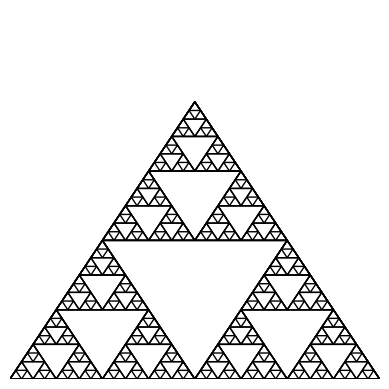

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_triangle(vertices, ax):
    triangle = patches.Polygon(vertices, fill=False, edgecolor='black')
    ax.add_patch(triangle)

def midpoint(point1, point2):
    return [(point1[0] + point2[0]) / 2, (point1[1] + point2[1]) / 2]

def sierpinski(vertices, level, ax):
    draw_triangle(vertices, ax)
    if level > 0:
        sierpinski([vertices[0], midpoint(vertices[0], vertices[1]), midpoint(vertices[0], vertices[2])], level-1, ax)
        sierpinski([vertices[1], midpoint(vertices[0], vertices[1]), midpoint(vertices[1], vertices[2])], level-1, ax)
        sierpinski([vertices[2], midpoint(vertices[2], vertices[1]), midpoint(vertices[0], vertices[2])], level-1, ax)

def main():
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_axis_off()
    vertices = [[0, 0], [0.5, 0.75], [1, 0]]
    sierpinski(vertices, 5, ax)
    plt.show()

main()

In [ ]:
from pathlib import Path

# ANSI escape codes for colored output
COLOR_BLUE = "\033[94m"
COLOR_RESET = "\033[0m"


def display_tree(path: Path, indent: str = "", prefix: str = "") -> None:
    if path.is_dir():
        # Use blue color for directories
        print(indent + prefix + COLOR_BLUE + str(path.name) + COLOR_RESET)
        indent += "    " if prefix else ""

        # Get a sorted list of children, with directories last
        children = sorted(path.iterdir(), key=lambda x: (x.is_file(), x.name))

        for index, child in enumerate(children):
            # Check if the current child is the last one in the directory
            is_last = index == len(children) - 1
            display_tree(child, indent, "└── " if is_last else "├── ")
    else:
        print(indent + prefix + str(path.name))


if __name__ == "__main__":
    root = Path("")
    display_tree(root)


├── .config
    ├── configurations
        └── config_default
    ├── logs
        └── 2025.11.20
            ├── 14.30.04.285207.log
            ├── 14.30.27.010422.log
            ├── 14.30.35.382199.log
            ├── 14.30.36.623222.log
            ├── 14.30.45.231815.log
            └── 14.30.45.937471.log
    ├── .last_opt_in_prompt.yaml
    ├── .last_survey_prompt.yaml
    ├── .last_update_check.json
    ├── active_config
    ├── config_sentinel
    ├── default_configs.db
    ├── gce
    └── hidden_gcloud_config_universe_descriptor_data_cache_configs.db
└── sample_data
    ├── README.md
    ├── anscombe.json
    ├── california_housing_test.csv
    ├── california_housing_train.csv
    ├── mnist_test.csv
    └── mnist_train_small.csv
